# Source Separation Using independent component analysis with standard and natural gradient learning 

## Adam Froghyar
## TU Berlin
## 05.2019

In [1]:
from __future__ import division
import numpy as np
import librosa
from librosa import display
import matplotlib.pyplot as plt
%matplotlib inline  
np.random.seed(12)

In [2]:
# Add Path!
dataPath = '/Volumes/ADAM SSHD/ownCloud/clientsync/TU Berlin/Kurse/SS 2019/Machine Intelligence 2/Week 5/sounds/'

In [3]:
x1 = np.loadtxt(dataPath + 'sound1.dat')
x2 = np.loadtxt(dataPath + 'sound2.dat')
sample_rate = 8192

A = np.random.random(size = (2,2))
print('The mixing matrix: ','\n',A)
sources = np.array([x1,x2])
mixed = np.dot(A,sources)
perm1 = np.random.permutation(mixed[0])
perm2 = np.random.permutation(mixed[1])
permutated = np.array([perm1,perm2])

spectrogram1 = np.abs(librosa.stft(x1,
                                 n_fft     = 512,
                                 hop_length = 256))
spectrogram2 = np.abs(librosa.stft(x2,
                                 n_fft     = 512,
                                 hop_length = 256))
spectrogram3 = np.abs(librosa.stft(mixed[0,:],
                                 n_fft     = 512,
                                 hop_length = 256))
spectrogram4 = np.abs(librosa.stft(mixed[1,:],
                                 n_fft     = 512,
                                 hop_length = 256))
spectrogram5 = np.abs(librosa.stft(permutated[1,:],
                                 n_fft     = 512,
                                 hop_length = 256))
spectrogram6 = np.abs(librosa.stft(permutated[1,:],
                                 n_fft     = 512,
                                 hop_length = 256))

The mixing matrix:  
 [[0.15416284 0.7400497 ]
 [0.26331502 0.53373939]]


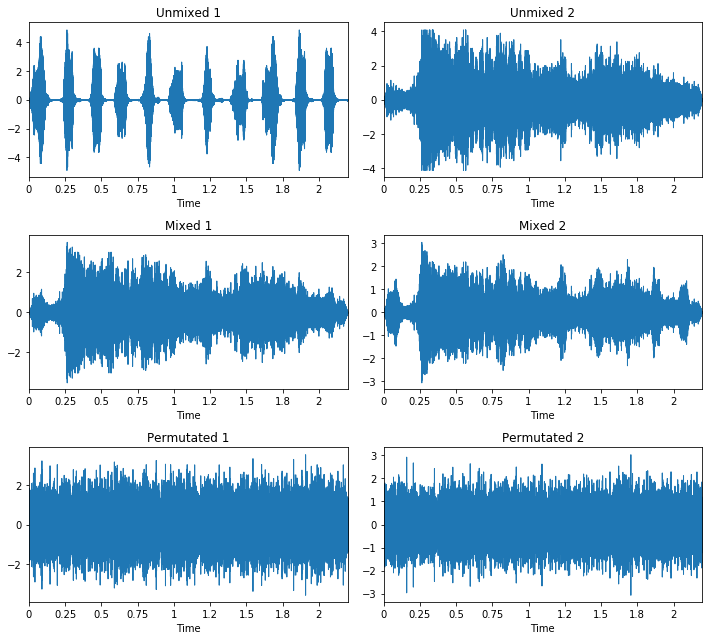

In [4]:
plt.figure(111, figsize = (10,9))

plt.subplot(3,2,1)
librosa.display.waveplot(x1,sr= sample_rate)
plt.title('Unmixed 1')
plt.subplot(3,2,2)
librosa.display.waveplot(x2,sr= sample_rate)
plt.title('Unmixed 2')
plt.subplot(3,2,3)
librosa.display.waveplot(mixed[0,:],sr= sample_rate)
plt.title('Mixed 1')
plt.subplot(3,2,4)
librosa.display.waveplot(mixed[1,:],sr= sample_rate)
plt.title('Mixed 2')
plt.subplot(3,2,5)
librosa.display.waveplot(permutated[0,:],sr= sample_rate)
plt.title('Permutated 1')
plt.subplot(3,2,6)
librosa.display.waveplot(permutated[1,:],sr= sample_rate)
plt.title('Permutated 2')
plt.tight_layout()

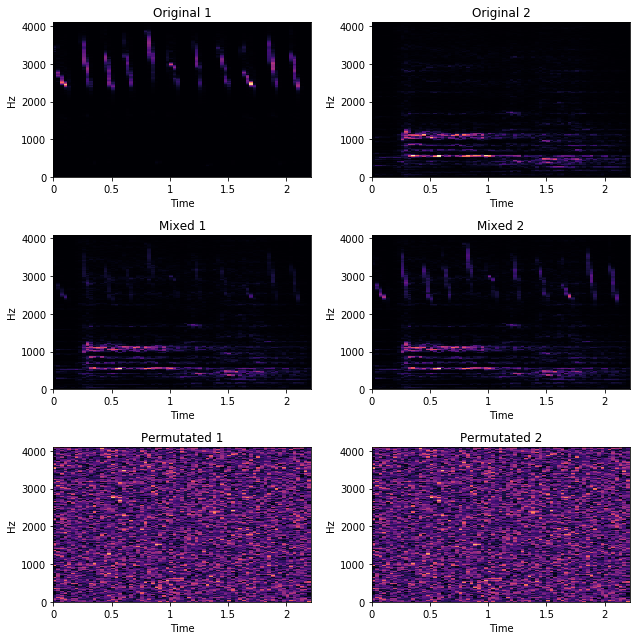

In [5]:
plt.figure(222, figsize = (9,9))

plt.subplot(3,2,1)
librosa.display.specshow(spectrogram1, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Original 1')
plt.tight_layout()
plt.subplot(3,2,2)
librosa.display.specshow(spectrogram2, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Original 2')
plt.tight_layout()
plt.subplot(3,2,3)
librosa.display.specshow(spectrogram3, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Mixed 1')
plt.tight_layout()
plt.subplot(3,2,4)
librosa.display.specshow(spectrogram4, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Mixed 2')
plt.tight_layout()
plt.subplot(3,2,5)
librosa.display.specshow(spectrogram5, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Permutated 1')
plt.tight_layout()
plt.subplot(3,2,6)
librosa.display.specshow(spectrogram6, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Permutated 2')
plt.tight_layout()


In [6]:
# Calculating correlations between sources and mixtures

stds_source = np.std(sources, axis=1)
stds_mix = np.std(mixed, axis=1)
correlation = np.cov(sources,mixed)[0:2,2:] / (stds_mix * stds_source)
print('Correlation between sources and mixed sources are: ' + '\n' + str(correlation))

Correlation between sources and mixed sources are: 
[[0.20506967 0.44311581]
 [0.97936423 0.89701666]]


In [7]:
# Centering mixed
mixed_center = mixed - mixed.mean(axis=1).reshape(2,1)

In [8]:
def f(y):
    x  = 1/(1+np.exp(-y))
    return 1-2*x

In [9]:
def gradient(W,x,eta):
    W_inv = np.linalg.inv(W)
    dW = W_inv.T + f(np.dot(W,x)).dot(x)
    W = W + eta * dW
    return W

In [10]:
W = np.random.random(size = (2,2))
U = W # for natural gradient
print('Initialised random unmixing matrix: ','\n',W)
print()
eta_0 = 0.1
for t in range(len(mixed_center[0])):
    if(t%5000 == 0):
        print(' Working on Iteration: ' + str(t))
    eta = eta_0 / (t+1)
    x = mixed_center[:,t]
    W = gradient(W,x,eta)
W_standard = W
print()
print('Estimated unmixing matrix using standard gradient: ','\n',W_standard)

Initialised random unmixing matrix:  
 [[0.28159974 0.83304948]
 [0.15907225 0.25898915]]

 Working on Iteration: 0
 Working on Iteration: 5000
 Working on Iteration: 10000
 Working on Iteration: 15000

Estimated unmixing matrix using standard gradient:  
 [[-0.27015733  1.57707969]
 [ 1.88812443 -0.35899357]]


In [11]:
def natural(W,x,eta):
    dW =  f(np.dot(W,x))
    dW = np.dot(dW.dot(np.dot(W,x)), W)
    W = W + (eta * (dW+W))
    return W    

In [12]:
print('Initialised random unmixing matrix: ','\n',U)
print()
eta_0 = 0.01
for t in range(len(mixed_center[0])):
    if(t%5000 == 0):
        print(' Working on Iteration: ' + str(t))
    eta = eta_0 / (t+1)
    x = mixed_center[:,t]
    U = natural(U,x,eta)
W_natural = U
print()
print('Estimated unmixing matrix using natural gradient: ','\n',W_natural)

Initialised random unmixing matrix:  
 [[0.28159974 0.83304948]
 [0.15907225 0.25898915]]

 Working on Iteration: 0
 Working on Iteration: 5000
 Working on Iteration: 10000
 Working on Iteration: 15000

Estimated unmixing matrix using natural gradient:  
 [[0.30858235 0.91287148]
 [0.1743144  0.28380524]]


In [13]:
gradient_sources = W_standard.dot(mixed)
natural_sources = W_natural.dot(mixed)

In [14]:
# Outputing files

original_1 = librosa.output.write_wav('original_1.wav', x1, sr = sample_rate)
original_2 = librosa.output.write_wav('original_2.wav', x2, sr = sample_rate)
mixed_1 = librosa.output.write_wav('mixed_1.wav', mixed[0,:], sr = sample_rate)
mixed_2 = librosa.output.write_wav('mixed_2.wav', mixed[0,:], sr = sample_rate)
perm_1 = librosa.output.write_wav('perm_1.wav', perm1, sr = sample_rate)
perm_2 = librosa.output.write_wav('perm_2.wav', perm2, sr = sample_rate)
grad_1 = librosa.output.write_wav('grad_1.wav', gradient_sources[0,:], sr = sample_rate)
grad_2 = librosa.output.write_wav('grad_2.wav', gradient_sources[1,:], sr = sample_rate)
natural_1 = librosa.output.write_wav('natural_1.wav', natural_sources[0,:], sr = sample_rate)
natural_2 = librosa.output.write_wav('natural_2.wav', natural_sources[1,:], sr = sample_rate)

In [15]:
spectrogram7 = np.abs(librosa.stft(gradient_sources[0,:],
                                 n_fft     = 512,
                                 hop_length = 256))
spectrogram8 = np.abs(librosa.stft(gradient_sources[1,:],
                                 n_fft     = 512,
                                 hop_length = 256))
spectrogram9 = np.abs(librosa.stft(natural_sources[0,:],
                                 n_fft     = 512,
                                 hop_length = 256))
spectrogram10 = np.abs(librosa.stft(natural_sources[1,:],
                                 n_fft     = 512,
                                 hop_length = 256))

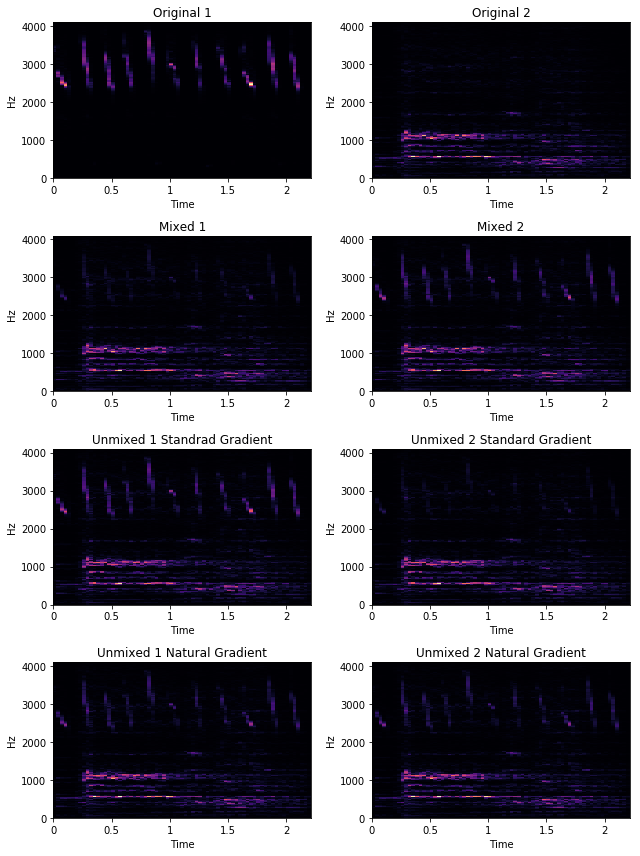

In [16]:
plt.figure(222, figsize = (9,12))

plt.subplot(4,2,1)
librosa.display.specshow(spectrogram1, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Original 1')
plt.tight_layout()
plt.subplot(4,2,2)
librosa.display.specshow(spectrogram2, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Original 2')
plt.tight_layout()
plt.subplot(4,2,3)
librosa.display.specshow(spectrogram3, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Mixed 1')
plt.tight_layout()
plt.subplot(4,2,4)
librosa.display.specshow(spectrogram4, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Mixed 2')
plt.tight_layout()
plt.subplot(4,2,5)
librosa.display.specshow(spectrogram7, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Unmixed 1 Standrad Gradient')
plt.tight_layout()
plt.subplot(4,2,6)
librosa.display.specshow(spectrogram8, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Unmixed 2 Standard Gradient')
plt.tight_layout()
plt.subplot(4,2,7)
librosa.display.specshow(spectrogram9, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Unmixed 1 Natural Gradient')
plt.tight_layout()
plt.subplot(4,2,8)
librosa.display.specshow(spectrogram10, y_axis = 'linear', 
                         x_axis = 'time', sr=sample_rate, hop_length=256)
plt.title('Unmixed 2 Natural Gradient')
plt.tight_layout()

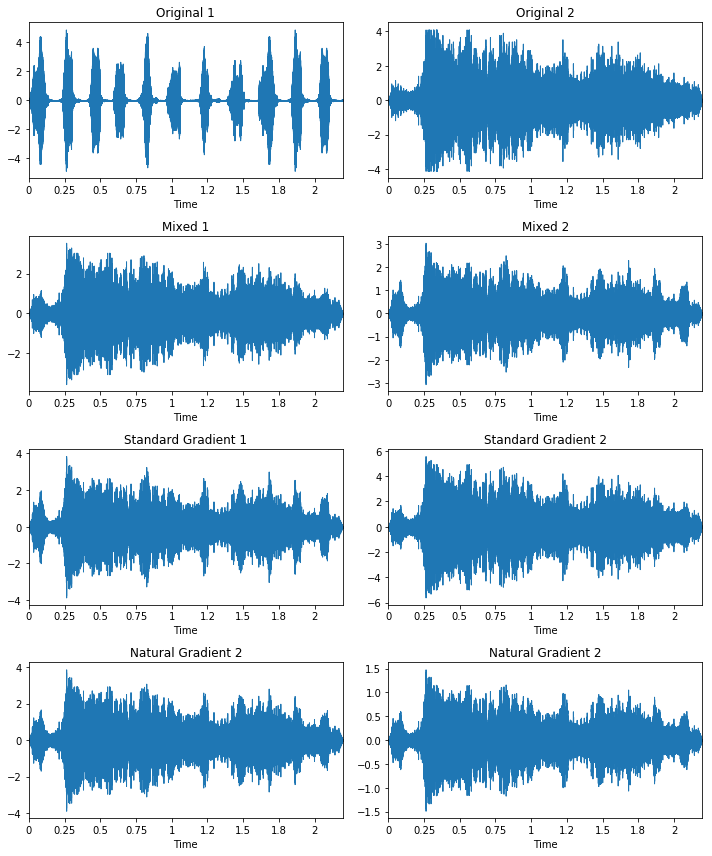

In [17]:
plt.figure(111, figsize = (10,12))

plt.subplot(4,2,1)
librosa.display.waveplot(x1,sr= sample_rate)
plt.title('Original 1')
plt.subplot(4,2,2)
librosa.display.waveplot(x2,sr= sample_rate)
plt.title('Original 2')
plt.subplot(4,2,3)
librosa.display.waveplot(mixed[0,:],sr= sample_rate)
plt.title('Mixed 1')
plt.subplot(4,2,4)
librosa.display.waveplot(mixed[1,:],sr= sample_rate)
plt.title('Mixed 2')
plt.subplot(4,2,5)
librosa.display.waveplot(gradient_sources[0,:],sr= sample_rate)
plt.title('Standard Gradient 1')
plt.subplot(4,2,6)
librosa.display.waveplot(gradient_sources[1,:],sr= sample_rate)
plt.title('Standard Gradient 2')
plt.tight_layout()
plt.subplot(4,2,7)
librosa.display.waveplot(natural_sources[0,:],sr= sample_rate)
plt.title('Natural Gradient 2')
plt.tight_layout()
plt.subplot(4,2,8)
librosa.display.waveplot(natural_sources[1,:],sr= sample_rate)
plt.title('Natural Gradient 2')
plt.tight_layout()